'data.frame':	10886 obs. of  12 variables:
 $ datetime  : chr  "01-01-2011 00:00" "01-01-2011 01:00" "01-01-2011 02:00" "01-01-2011 03:00" ...
 $ season    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ holiday   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ workingday: int  0 0 0 0 0 0 0 0 0 0 ...
 $ weather   : int  1 1 1 1 1 2 1 1 1 1 ...
 $ temp      : num  9.84 9.02 9.02 9.84 9.84 ...
 $ atemp     : num  14.4 13.6 13.6 14.4 14.4 ...
 $ humidity  : int  81 80 80 75 75 75 80 86 75 76 ...
 $ windspeed : num  0 0 0 0 0 ...
 $ casual    : int  3 8 5 3 0 0 2 1 1 8 ...
 $ registered: int  13 32 27 10 1 1 0 2 7 6 ...
 $ count     : int  16 40 32 13 1 1 2 3 8 14 ...
'data.frame':	10886 obs. of  13 variables:
 $ datetime  : POSIXct, format: "2001-01-20 11:00:00" "2001-01-20 11:01:00" ...
 $ season    : Factor w/ 4 levels "1","2","3","4": 1 1 1 1 1 1 1 1 1 1 ...
 $ holiday   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ workingday: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ weather   : Factor 

[1] "datetime"   "season"     "holiday"    "workingday" "weather"   
 [6] "temp"       "atemp"      "humidity"   "windspeed"  "hour"      
[11] "day"        "month"

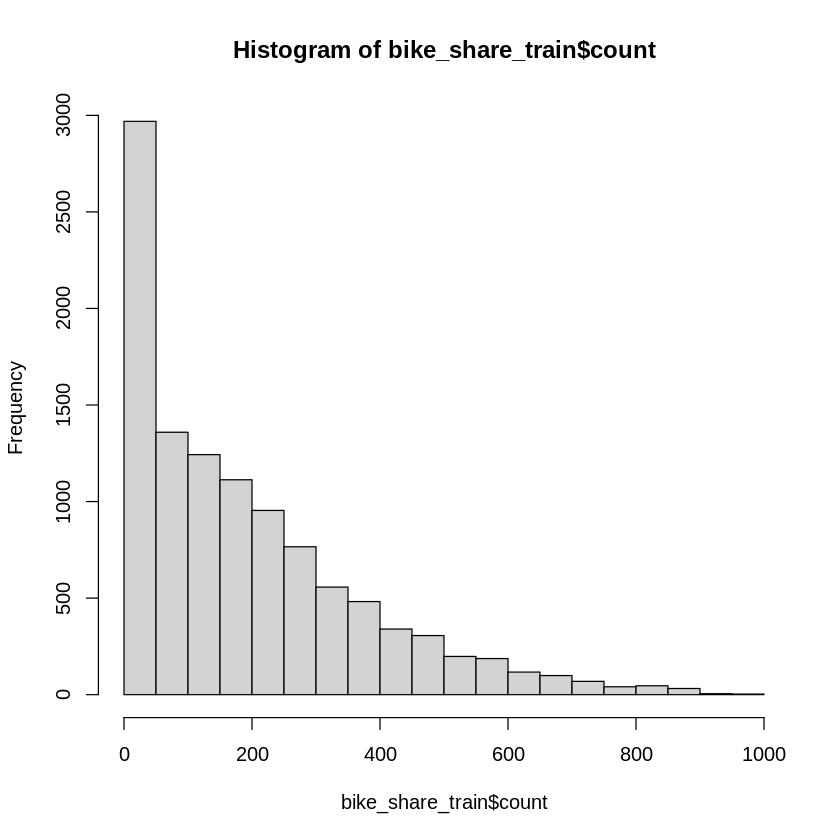

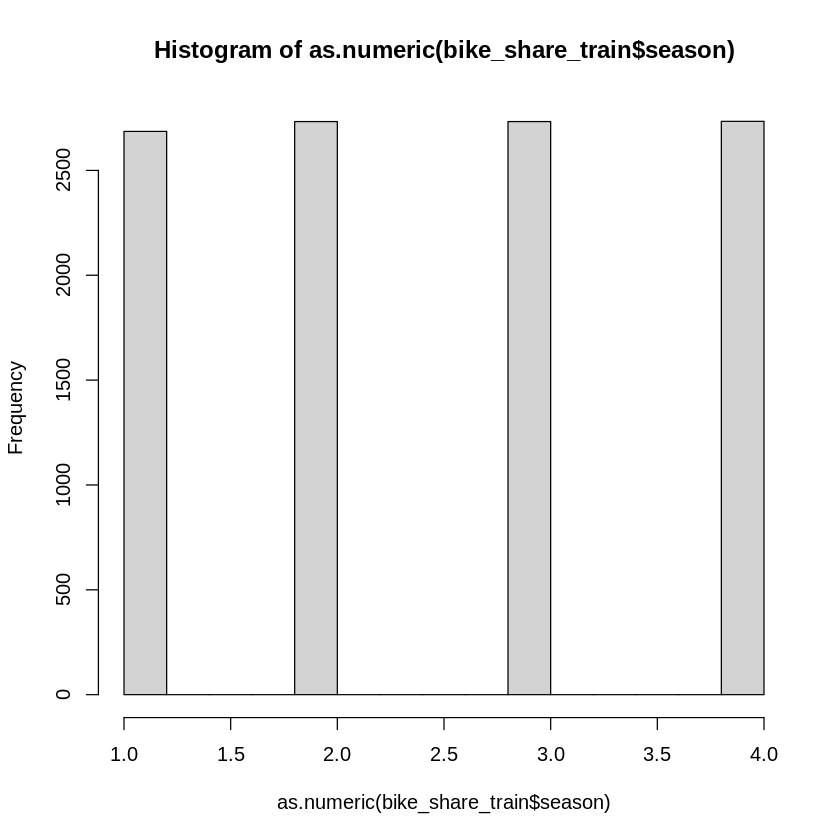

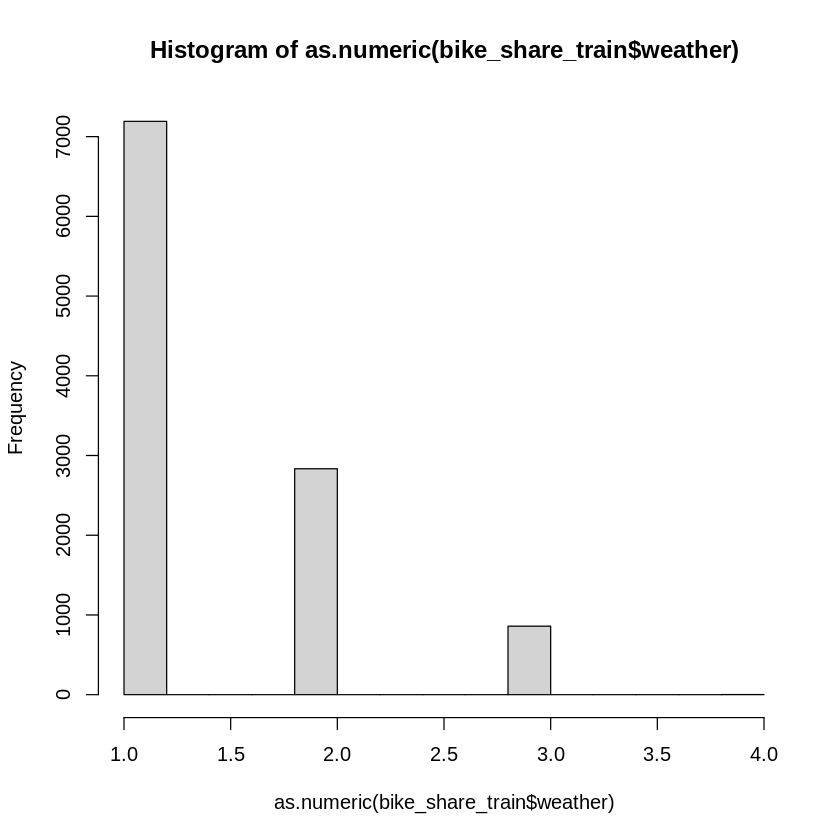

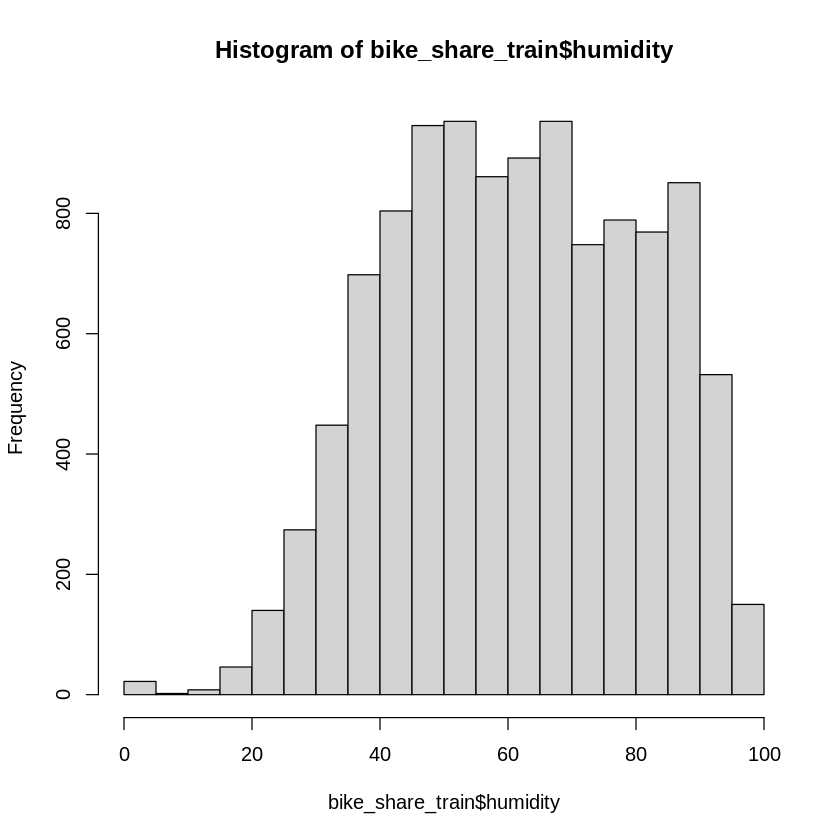

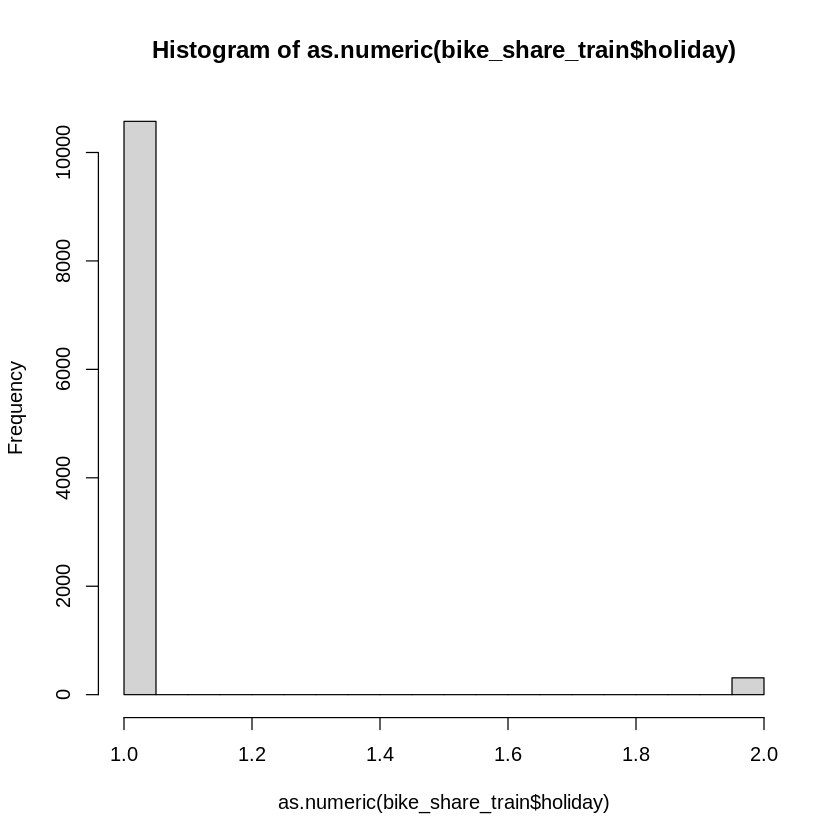

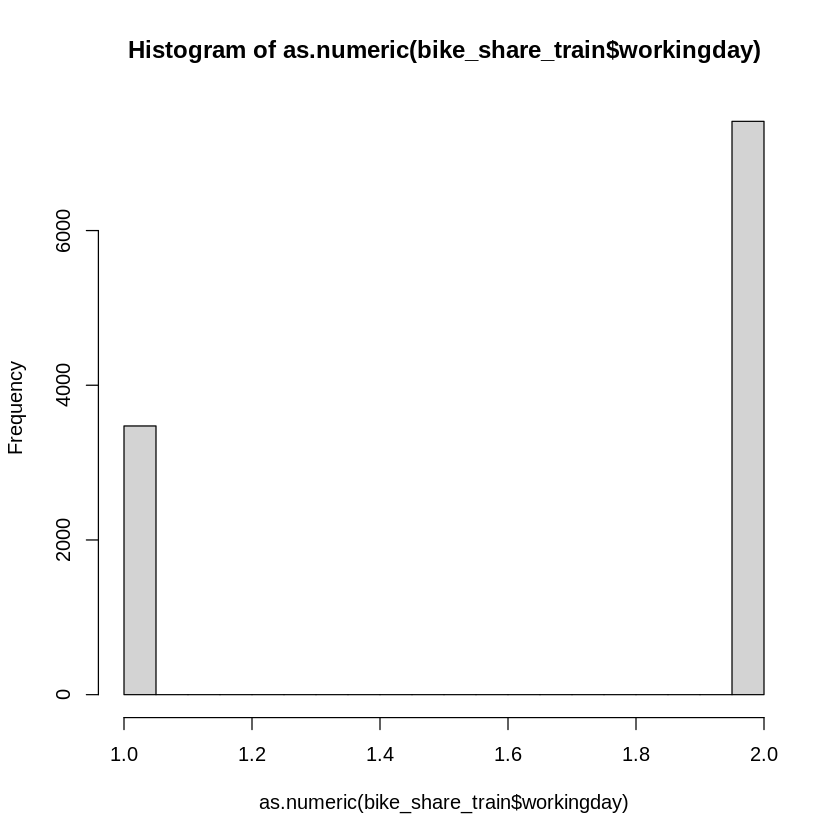

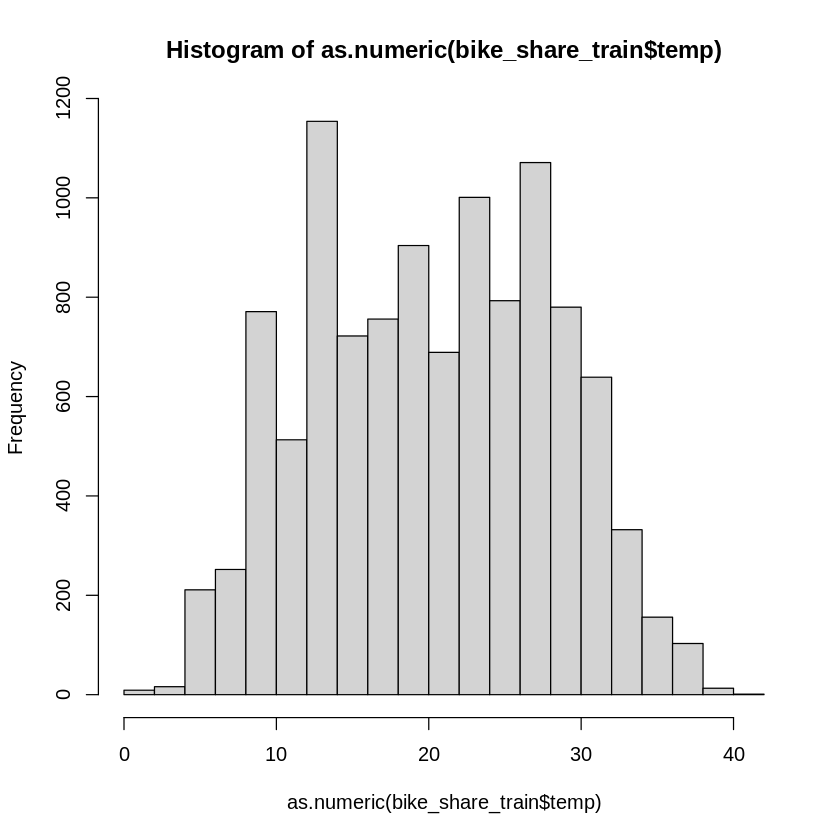

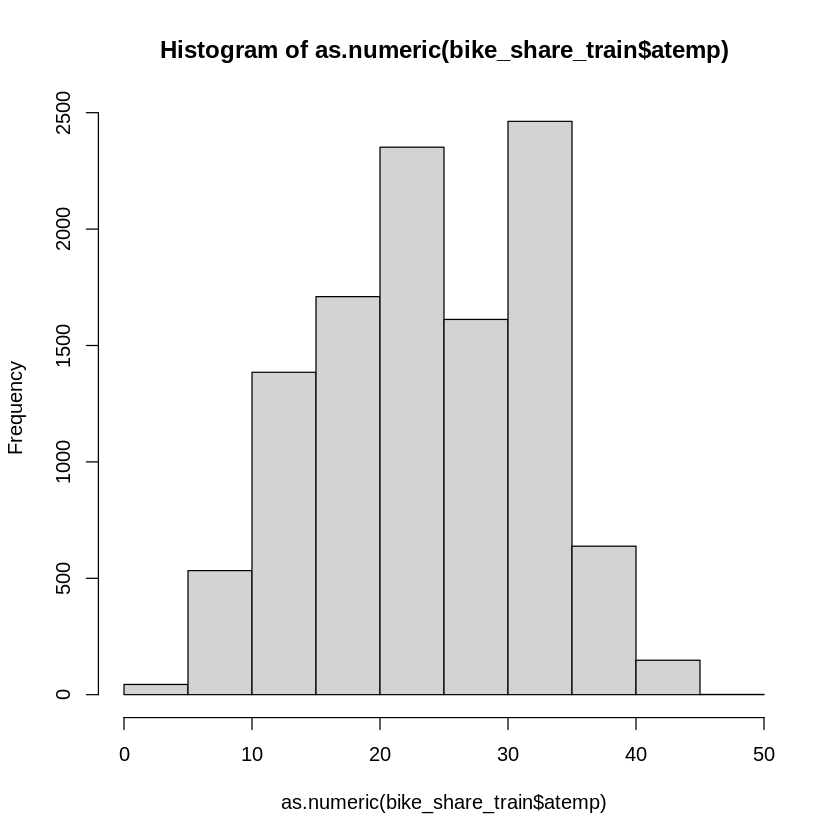

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plogr’, ‘gsubfn’, ‘proto’, ‘RSQLite’, ‘chron’


Warning message:
“no DISPLAY variable so Tk is not available”


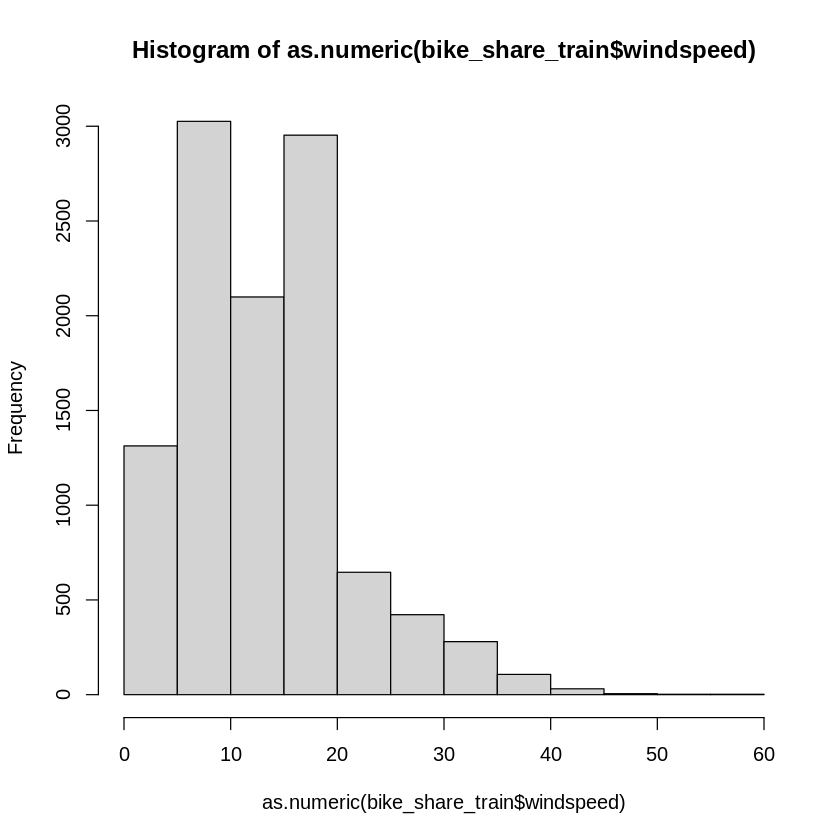

In [ ]:
# Reading the csv files
# Ensure the correct file path is provided. If the file is in the same directory,
# only the filename is needed. If not, provide the full path to the file.
bike_share_train <- read.csv("/content/bike_train.csv", header=T)
bike_share_test <- read.csv("/content/test.csv", header=T)



str(bike_share_train)
#head(bike_share_train)

# Ignore the casual, registered fields as this sum is equal to count field
bike_share_train <- bike_share_train[,-c(10,11)]

# Converting integer to factor on training set
bike_share_train$season <- as.factor(bike_share_train$season)
bike_share_train$holiday <- as.factor(bike_share_train$holiday)
bike_share_train$workingday <- as.factor(bike_share_train$workingday)
bike_share_train$weather <- as.factor(bike_share_train$weather)


# Converting int to factor on test set
bike_share_test$season <- as.factor(bike_share_test$season)
bike_share_test$holiday <- as.factor(bike_share_test$holiday)
bike_share_test$workingday <- as.factor(bike_share_test$workingday)
bike_share_test$weather <- as.factor(bike_share_test$weather)


#Deriving day, hour from datetime field Train & Test
library(lubridate,quietly = TRUE)
bike_share_train$datetime <- ymd_hms(bike_share_train$datetime)
bike_share_train$hour <- hour(bike_share_train$date)
bike_share_train$day <- wday(bike_share_train$date)
bike_share_train$month <- month(bike_share_train$date, label=T)
str(bike_share_train)
bike_share_train[,11:13]<-lapply(bike_share_train[,11:13], factor) #converting multiple derived variables into factors


bike_share_test$datetime <- ymd_hms(bike_share_test$datetime)
bike_share_test$hour <- hour(bike_share_test$date)
bike_share_test$day <- wday(bike_share_test$date)
bike_share_test$month <- month(bike_share_test$date, label=T)
str(bike_share_test)
names(bike_share_test)
bike_share_test[,10:12]<-lapply(bike_share_test[,10:12], factor) #converting derived variables into factors



# Removing datetime field
bike_share_train <- bike_share_train[,-1]

# Understand the distribution of numerical variables and generate a frequency table for numeric variables.
# we'll test and plot a histogram for each numerical variables and analyze the distribution.
hist(bike_share_train$count)
hist(as.numeric(bike_share_train$season))
hist(as.numeric(bike_share_train$weather))
hist(bike_share_train$humidity)
hist(as.numeric(bike_share_train$holiday))
hist(as.numeric(bike_share_train$workingday))
hist(as.numeric(bike_share_train$temp))
hist(as.numeric(bike_share_train$atemp))
hist(as.numeric(bike_share_train$windspeed))

#Exploratory Data Analysis
# Install sqldf in R environment
install.packages("sqldf", repos="http://cran.us.r-project.org") #Install the sqldf package

library(sqldf, quietly = TRUE)
library(ggplot2, quietly = TRUE)

# Install rpy2 in R to bridge Python and R
#install.packages("rpy2")


# Get the average count of bikes rent by season, hour

# If you need to install any Python packages,
# you should do it outside of the R script using your


Rows: 10886 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): datetime
dbl (11): season, holiday, workingday, weather, temp, atemp, humidity, winds...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
01-01-2011 00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
01-01-2011 01:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
01-01-2011 02:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
01-01-2011 03:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
01-01-2011 04:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
01-01-2011 05:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1


   datetime             season         holiday          workingday    
 Length:10886       Min.   :1.000   Min.   :0.00000   Min.   :0.0000  
 Class :character   1st Qu.:2.000   1st Qu.:0.00000   1st Qu.:0.0000  
 Mode  :character   Median :3.000   Median :0.00000   Median :1.0000  
                    Mean   :2.507   Mean   :0.02857   Mean   :0.6809  
                    3rd Qu.:4.000   3rd Qu.:0.00000   3rd Qu.:1.0000  
                    Max.   :4.000   Max.   :1.00000   Max.   :1.0000  
    weather           temp           atemp          humidity     
 Min.   :1.000   Min.   : 0.82   Min.   : 0.76   Min.   :  0.00  
 1st Qu.:1.000   1st Qu.:13.94   1st Qu.:16.66   1st Qu.: 47.00  
 Median :1.000   Median :20.50   Median :24.24   Median : 62.00  
 Mean   :1.418   Mean   :20.23   Mean   :23.66   Mean   : 61.89  
 3rd Qu.:2.000   3rd Qu.:26.24   3rd Qu.:31.06   3rd Qu.: 77.00  
 Max.   :4.000   Max.   :41.00   Max.   :45.45   Max.   :100.00  
   windspeed          casual         regi

[1] "datetime"   "season"     "holiday"    "workingday" "weather"   
 [6] "temp"       "atemp"      "humidity"   "windspeed"  "casual"    
[11] "registered" "count"

Warning message in rm(hour):
“object 'hour' not found”



Call:
lm(formula = count ~ temp + humidity + hour, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-329.35 -100.61  -26.22   70.95  667.35 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -719.79064   34.61805  -20.79   <2e-16 ***
temp           8.44458    0.18882   44.72   <2e-16 ***
humidity      -2.60510    0.07654  -34.03   <2e-16 ***
hour          78.39936    2.94526   26.62   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 152.9 on 10882 degrees of freedom
Multiple R-squared:  0.2875,	Adjusted R-squared:  0.2873 
F-statistic:  1463 on 3 and 10882 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


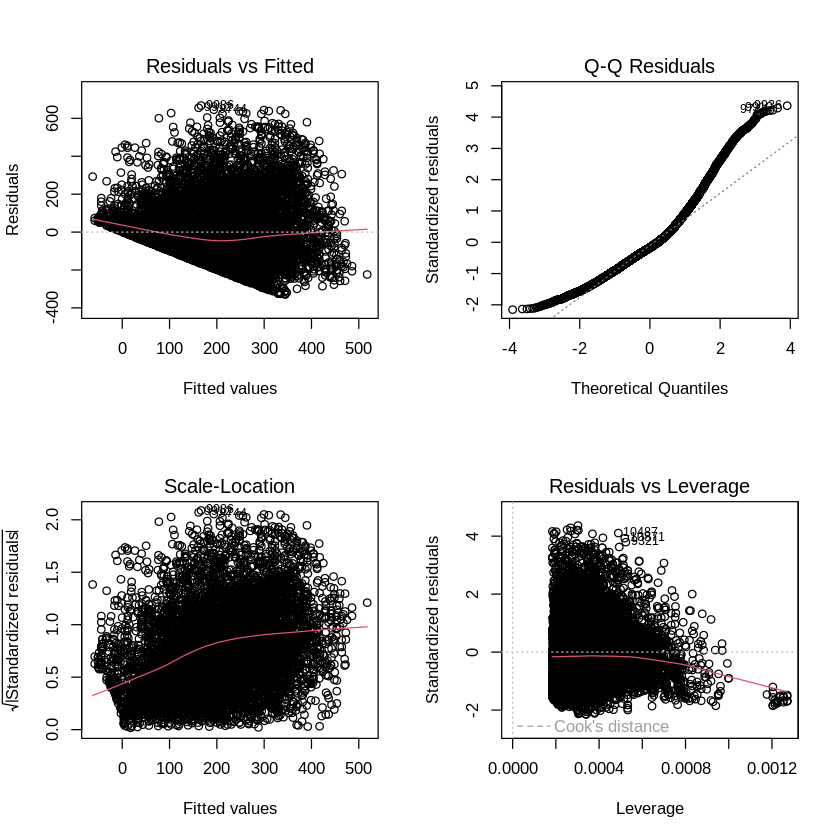

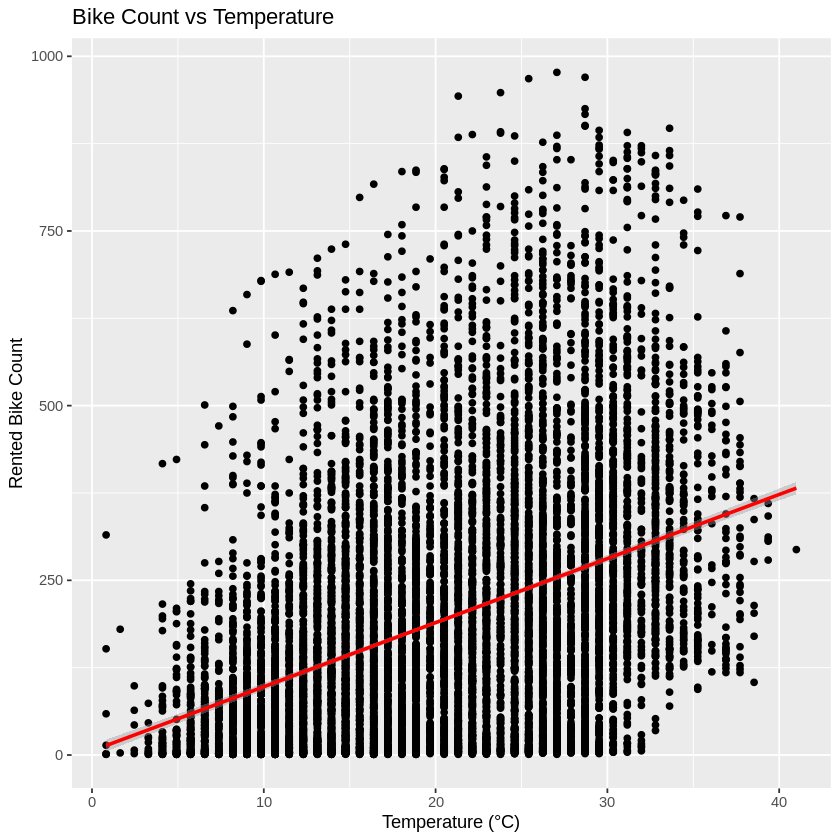

In [ ]:
library(readr)

# Load the dataset
data <- read_csv("/content/bike_train.csv")

# View the first few rows of the data to understand its structure
head(data)

# Summary of the dataset
summary(data)

# Check the actual column names in your dataframe
names(data)

# Ensure that 'hour' is not defined as a function in your environment.
# If it is, rename the function to something else.
if(exists("hour") && is.function(hour)) {
  # Rename the function to avoid conflict
  hour_func <- hour
  rm(hour)
}

# Extract hour from the datetime column
data$hour <- hour(ymd_hms(data$datetime))

# Linear regression model
model <- lm(count ~ temp + humidity + hour, data = data)

# Print the summary of the linear regression model
summary(model)

# Plot the regression diagnostics (Residuals, QQ plot, etc.)
par(mfrow = c(2, 2))  # Set plot layout
plot(model)

# Scatter plot with regression line
ggplot(data, aes(x = temp, y = count)) +
  geom_point() +
  geom_smooth(method = "lm", color = "red") +
  ggtitle("Bike Count vs Temperature") +
  xlab("Temperature (°C)") +
  ylab("Rented Bike Count")

In [6]:
# Load necessary libraries
library(readr)
library(caret)

# Load the dataset
data <- read_csv("/content/bike_train.csv")

# Select predictors and target variable
X <- data[, c("temp", "atemp", "humidity", "windspeed")]
y <- data$count

# Combine the data for splitting
data_combined <- data.frame(X, y)

# Split the data into training and testing sets (80% training, 20% testing)
set.seed(42)
trainIndex <- createDataPartition(data_combined$y, p = .8,
                                  list = FALSE,
                                  times = 1)
trainData <- data_combined[trainIndex, ]
testData  <- data_combined[-trainIndex, ]

# Train the linear model
model <- lm(y ~ ., data = trainData)

# Make predictions
predictions <- predict(model, testData)

# Calculate RMSE
rmse <- sqrt(mean((testData$y - predictions)^2))

# Calculate R-squared
r_squared <- cor(testData$y, predictions)^2

# Output the RMSE and R-squared
cat("RMSE:", rmse, "\n")
cat("R-squared:", r_squared, "\n")


Loading required package: ggplot2

Loading required package: lattice

Rows: 10886 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): datetime
dbl (11): season, holiday, workingday, weather, temp, atemp, humidity, winds...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


RMSE: 161.1389 
R-squared: 0.2328418 


In [5]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lava’, ‘prodlim’, ‘ipred’, ‘recipes’


